In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# from scipy.misc import imresize
import cv2


ModuleNotFoundError: No module named 'numpy'

ValueError: zero-size array to reduction operation minimum which has no identity

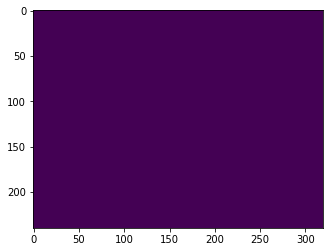

In [120]:
# coding: utf-8

# # Gait Energy Image

# In[1]:


import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
# from scipy.misc import imresize
import cv2
from skimage.transform import resize


# In[2]:


files = os.listdir(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144')
images = [imread(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144'+'\\'+f) for f in files]


# In[3]:


plt.imshow(images[0])


# In[4]:


def mass_center(img,is_round=True):
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
    if is_round:
        return int(round(X_)),int(round(Y_))
    return X_,Y_

def image_extract(img,newsize):
    x_s = np.where(img.mean(axis=0)!=0)[0].min()
    x_e = np.where(img.mean(axis=0)!=0)[0].max()
    
    y_s = np.where(img.mean(axis=1)!=0)[0].min()
    y_e = np.where(img.mean(axis=1)!=0)[0].max()
    
    x_c,_ = mass_center(img)
#     x_c = (x_s+x_e)//2
    x_s = x_c-newsize[1]//2
    x_e = x_c+newsize[1]//2
    img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
    return cv2.resize(img,newsize)


# In[5]:


images = [image_extract(i,(64,64)) for i in images]


# In[6]:


plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
plt.show()


# In[7]:


gei = np.mean(images,axis=0)


# In[8]:


plt.imshow(gei)
plt.show()

In [22]:
def get_ppl_block(images, resize):
    def mass_center(img,is_round=True):
        Y = img.mean(axis=1)
        X = img.mean(axis=0)
        Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
        X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
        if is_round:
            return int(round(X_)),int(round(Y_))
        return X_,Y_

    def image_extract(img,newsize):
        x_s = np.where(img.mean(axis=0)!=0)[0].min()
        x_e = np.where(img.mean(axis=0)!=0)[0].max()

        y_s = np.where(img.mean(axis=1)!=0)[0].min()
        y_e = np.where(img.mean(axis=1)!=0)[0].max()

        x_c,_ = mass_center(img)
    #     x_c = (x_s+x_e)//2
        x_s = x_c-newsize[1]//2
        x_e = x_c+newsize[1]//2
        img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
        return cv2.resize(img,newsize)

    crop_images = [image_extract(i, resize) for i in images]
    return crop_images

In [10]:
def Period_Detection(gallery: np.array, gallery_shape: tuple, alpha = 0.470, beta = 0.961) -> np.array:
    '''
    hip, knee, and ankle are 0.470, 0.715, 0.961
    '''
    
    #設定move_region的y軸最上和最下
    #這裡設為hip到ankle
    start = round(gallery_shape[0] * alpha)
    end = round(gallery_shape[0] * beta)
    
    period_result = np.empty(gallery.shape[0])
    
    for i, img in enumerate(gallery):
        move_region_aggregate = 0
        
        for h in range(start, end):
            
            #找出人在剪影中的最左和最右
            nonzero_index = list(np.nonzero(img[h])[0])
    
            if not nonzero_index:
                # 如果都是背景(全黑)則跳過
                continue
            left_most, right_most = nonzero_index[0], nonzero_index[-1]
            
            #算出最左和最右的pixel距離，也就是算出人體在剪影的擺動幅度
            move_region_aggregate  = move_region_aggregate + (right_most - left_most)
            
        #平均
        move_region_aggregate /= float((end - start + 1))
        period_result[i] = move_region_aggregate
        
    if period_result.shape[0] == 1:
        return period_result
    
    #normalize
    period_result = (period_result - np.min(period_result)) / np.ptp(period_result)
    
 
    
    return period_result
    

In [90]:
files = os.listdir(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\079\bg-01\054')
images = [cv2.imread(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\079\bg-01\054'+'\\'+f, -1) for f in files]
images = get_ppl_block(images, (64, 64))
images = np.array(images)

IndexError: index 8 is out of bounds for axis 0 with size 8

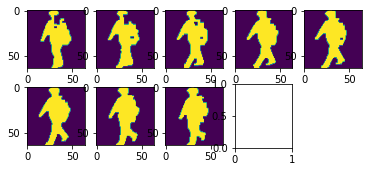

In [91]:
plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
plt.show()

In [92]:
period = Period_Detection(gallery=images, gallery_shape=images[0].shape)

In [93]:
period

array([0.        , 0.55555556, 0.86419753, 0.9382716 , 0.95061728,
       1.        , 0.92592593, 0.69135802])

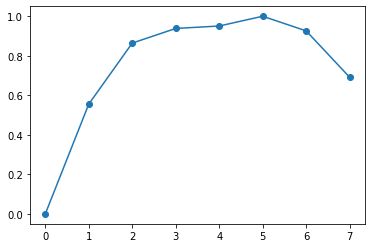

In [94]:
plt.plot([i for i, _ in enumerate(period)], period, '-o')

In [95]:
def Tk(m=0.3, nc=5) -> list:
    result = []
    for k in range(1, nc+1):
        tmp = [k/(nc+1) - (m/2), k/(nc+1) + m/2]
        result.append(tmp)
    return result

In [96]:
Tk()

[[0.016666666666666663, 0.31666666666666665],
 [0.18333333333333332, 0.4833333333333333],
 [0.35, 0.65],
 [0.5166666666666666, 0.8166666666666667],
 [0.6833333333333333, 0.9833333333333334]]

In [97]:
tk2_image = images[np.where((period > Tk()[1][0]) & (period < Tk()[1][1]))]

In [100]:
tk2_image.shape[0]

0

In [102]:
def GEI(images: np.array, resize: tuple, draw: bool = False) -> list:

    def mass_center(img,is_round=True):
        Y = img.mean(axis=1)
        X = img.mean(axis=0)
        Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
        X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
        if is_round:
            return int(round(X_)),int(round(Y_))
        return X_,Y_

    def image_extract(img,newsize):
        x_s = np.where(img.mean(axis=0)!=0)[0].min()
        x_e = np.where(img.mean(axis=0)!=0)[0].max()

        y_s = np.where(img.mean(axis=1)!=0)[0].min()
        y_e = np.where(img.mean(axis=1)!=0)[0].max()

        x_c,_ = mass_center(img)
    #     x_c = (x_s+x_e)//2
        x_s = x_c-newsize[1]//2
        x_e = x_c+newsize[1]//2
        img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
        return cv2.resize(img,newsize)

    images = [image_extract(i, resize) for i in images]
    gei = np.mean(images,axis=0)
    if draw:
        plt.imshow(gei)
        plt.show()
    
    return gei

In [46]:
for i in Tk():
    tk_image = images[np.where((period > i[0]) & (period < i[1]))]
    GEI(tk_image, (64, 64), draw=True)

TypeError: list indices must be integers or slices, not tuple

In [ ]:
g = os.walk(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh', topdown=False)

In [119]:
root = r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh'
subjects = os.listdir(root)
variations = os.listdir(root +'\\'+ subjects[0])
angles = os.listdir(root +'\\'+ subjects[0] + '\\' + variations[0])

ourputdir = r'C:\Users\User\Desktop\Aaron\College-level Applied Research\PEI_output'

if not os.path.isdir(ourputdir):
    os.mkdir(ourputdir)

for sub in subjects:
    sub_dir = f'{ourputdir}\\{sub}'
    if not os.path.isdir(sub_dir):
        os.mkdir(sub_dir)
        
    for var in variations:
        var_dir = f'{sub_dir}\\{var}'
        if not os.path.isdir(var_dir):
            os.mkdir(var_dir)
            
        for ang in angles:
            ang_dir = f'{var_dir}\\{ang}'
            if not os.path.isdir(ang_dir):
                os.mkdir(ang_dir)
            
            images_dir = f'{root}\\{sub}\\{var}\\{ang}'
            images_filename = os.listdir(images_dir)
            images = [cv2.imread(images_dir+'\\'+ f, -1) for f in images_filename]
            
            if images:           
                images_crop = images.copy()
                images_crop = get_ppl_block(images_crop, (64, 64))
                images_crop = np.array(images_crop)
                period = Period_Detection(gallery=images_crop, gallery_shape=images_crop[0].shape)
                for i, minmax in enumerate(Tk()):
                    images = np.array(images)
                    tk_image = images[np.where((period > minmax[0]) & (period < minmax[1]))]
                    if tk_image.shape[0] > 1:
                        gei = GEI(tk_image, (64, 64))
#                         plt.imshow(gei)
#                         plt.show()
                        cv2.imwrite(f'{ang_dir}\gei_{i}.png', gei)

ValueError: zero-size array to reduction operation minimum which has no identity

In [ ]:
import shutil

root = r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh'
subjects = os.listdir(root)
variations = os.listdir(root +'\\'+ subjects[0])
angles = os.listdir(root +'\\'+ subjects[0] + '\\' + variations[0])

ourputdir = r'C:\Users\User\Desktop\Aaron\College-level Applied Research\PEI_output'

if not os.path.isdir(ourputdir):
    os.mkdir(ourputdir)

for sub in subjects:
    sub_dir = f'{ourputdir}\\{sub}'
    if not os.path.isdir(sub_dir):
        os.mkdir(sub_dir)
        
    for var in variations:
        var_dir = f'{sub_dir}\\{var}'
        if not os.path.isdir(var_dir):
            os.mkdir(var_dir)
            
        for ang in angles:
            ang_dir = f'{var_dir}\\{ang}'
            if not os.path.isdir(ang_dir):
                os.mkdir(ang_dir)
            
            images_dir = f'{root}\\{sub}\\{var}\\{ang}'
            images_filename = os.listdir(images_dir)
            if not images_filename:
                print(images_dir)
                shutil.rmtree(images_dir)
                
            else:
                for f in images_filename:
                    img_file_dir = images_dir+'\\'+ f
                    img = cv2.imread(img_file_dir)
                    if (img == np.zeros(img.shape)).all():
                        print(img_file_dir)
                        os.remove(img_file_dir)
                    
#             images = [cv2.imread(images_dir+'\\'+ f, -1) for f in images_filename]

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\000
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144\005-bg-01-144-060.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144\005-bg-01-144-061.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144\005-bg-01-144-062.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144\005-bg-01-144-063.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144\005-bg-01-144-064.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\144\005-bg-01-144-065.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\bg-01\162\005-bg-01-162-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Rese

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\cl-01\000
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\cl-02\000
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\cl-02\108\005-cl-02-108-198.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\cl-02\108\005-cl-02-108-199.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\cl-02\108\005-cl-02-108-200.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\nm-01\000
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\nm-02\000
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\nm-03\000
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\005\nm-04\000
C:\Users\User\Desktop\Aaron\College-level A

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-006.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\cl-01\162\013-cl-01-162-008.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-006.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\013\nm-02\162\013-nm-02-162-008.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\026\nm-06\126\026-nm-06-126-049.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\026\nm-06\126\026-nm-06-126-050.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\026\nm-06\126\026-nm-06-126-051.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\030\cl-01\108\030-cl-01-108-044.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\030\nm-01\054\030-nm-01-054-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\030\nm-01\054\030-nm-01-054-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\030\nm-05\090\030-nm-05-090-049.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\033\nm-02\072\033-nm-02-072-116.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-008.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-009.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\cl-01\144\053-cl-01-144-010.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-006.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-009.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\053\nm-04\144\053-nm-04-144-010.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-006.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\bg-02\144\088-bg-02-144-008.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-006.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\cl-02\144\088-cl-02-144-008.png
C:\Users\User\Desktop\Aaron\Coll

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\126
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-005.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-006.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\144\088-nm-03-144-007.png
C:\Users\User\Desktop\Aaron\College-level Applied Rese

C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\162
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-03\180
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\054
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\126
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\144\088-nm-04-144-001.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\144\088-nm-04-144-002.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\144\088-nm-04-144-003.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\144\088-nm-04-144-004.png
C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\088\nm-04\162
C:\Users\User\Desktop

In [123]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [127]:
(img == np.zeros(img.shape)).all()

False

In [6]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [5]:
channel_enc = OneHotEncoder()
channel_enc.fit(np.reshape(range(opt.num_channel),[-1,1]))

NameError: name 'np' is not defined

In [2]:
import tensorflow as tf
import numpy as np
inputs = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100] 
sample_num = 2

idxs = tf.range(tf.shape(inputs)[0])
ridxs = tf.random.shuffle(idxs)[:sample_num]
rinput = tf.gather(inputs, ridxs)

In [9]:
inputs

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [18]:
inputs= tf.range(14)
tf.one_hot(inputs, len(inputs))

<tf.Tensor: shape=(14, 14), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)>

In [10]:
tf.one_hot(inputs, len(inputs))

<tf.Tensor: shape=(10, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [7]:
int(ridxs[0])

8

In [8]:
tf.shape(inputs)[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [4]:
rinput

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([90, 30])>

In [14]:
a = np.array([1,2,3])

In [20]:
a[rinput[1]]

2

In [20]:
 np.random.choice([1,2,3,5], 2)

array([2, 1])

In [5]:
import os
cwd = os.getcwd()

In [6]:
cwd

'C:\\Users\\andy1\\Desktop\\650S100\\College-level Applied Research\\gait_recognition'

In [21]:
from pathlib import Path

p = Path(os.path.abspath('')).parents[0]

In [22]:
p

WindowsPath('C:/Users/andy1/Desktop/650S100/College-level Applied Research')

In [25]:
f'{Path(os.path.abspath('')).parents[0]}'

SyntaxError: f-string: unmatched '(' (<ipython-input-25-54b7a8f61572>, line 1)